In [5]:
pip install pymorphy3

Defaulting to user installation because normal site-packages is not writeable
  Using cached pymorphy3-2.0.3-py3-none-any.whl.metadata (1.9 kB)
  Using cached dawg2_python-0.9.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached pymorphy3_dicts_ru-2.4.417150.4580142-py2.py3-none-any.whl.metadata (2.0 kB)
Using cached pymorphy3-2.0.3-py3-none-any.whl (53 kB)
Using cached dawg2_python-0.9.0-py3-none-any.whl (9.3 kB)
Using cached pymorphy3_dicts_ru-2.4.417150.4580142-py2.py3-none-any.whl (8.4 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import re
import nltk
import pymorphy3

from nltk.stem.snowball import SnowballStemmer

ModuleNotFoundError: No module named 'pymorphy3'

In [7]:
df = pd.read_csv('kinopoisk.csv')

In [8]:
df.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...


In [7]:
janr = ['драма', 'драма, фэнтези, криминал','драма, комедия, мелодрама, история, военный', 'драма, биография, история, военный','драма, комедия','фантастика, боевик, триллер, драма, детектив', 'боевик, триллер, драма, криминал',
        'мультфильм, мюзикл, драма, приключения, семейный','триллер, драма, криминал','комедия, фантастика, приключения','военный, комедия, драма, мелодрама',
        'драма, комедия, криминал','драма, криминал','криминал, драма','комедия, мелодрама, криминал','триллер, фантастика, драма, детектив',
        'биография, драма, мелодрама','фантастика, драма, приключения','фэнтези, приключения, драма, боевик','история, боевик, драма','фантастика, комедия, приключения', 
        'боевик, комедия, криминал','фантастика, боевик','комедия, криминал','криминал, драма, триллер','криминал, биография, комедия','драма, военный, биография, музыка',
        'фэнтези, приключения, драма, боевик','военный, драма, комедия','мультфильм, фантастика, приключения, семейный','мультфильм, фэнтези, комедия, приключения, семейный, музыка',
        'криминал, комедия, боевик','фэнтези, приключения, драма, боевик','драма, криминал','комедия, драма, криминал, детектив',
        'фэнтези, боевик, приключения','триллер, детектив, драма','фантастика, боевик, триллер, криминал, драма','драма','мелодрама, история, триллер, драма',
        'драма, детектив, криминал','драма','драма, фантастика','мелодрама, комедия, криминал, музыка','драма, семейный, биография',
        'комедия, мелодрама, драма','аниме, мультфильм, фэнтези, приключения, семейный','комедия, приключения, мелодрама, мюзикл','драма, военный, история',
        'фэнтези, драма, мелодрама, семейный']

In [ ]:
df.info()

In [2]:
df['overview'][0]

NameError: name 'df' is not defined

In [3]:
df['overview'][200]

NameError: name 'df' is not defined

In [4]:
st = '\xa0—'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [17]:
df['prep_text']= [remove_othersymbol(text.lower()) for text in df['overview']]

In [19]:
df['prep_text'][0]

'бухгалтер энди дюфрейн обвинён в убийстве собственной жены и её любовника. оказавшись в тюрьме под названием шоушенк; он сталкивается с жестокостью и беззаконием; царящими по обе стороны решётки. каждый; кто попадает в эти стены; становится их рабом до конца жизни. но энди; обладающий живым умом и доброй душой; находит подход как к заключённым; так и к охранникам; добиваясь их особого к себе расположения.'

In [21]:
df['prep_text'][200]

'в легендах и мифах есть персонажи; главная задача которых   исполнять желания. у арабов это   джинны; у ирландцев   лепреконы; у китайцев   драконы; у европейцев   феи и лесные духи. а в америке есть некто о. ж. грант   довольно странный и забавный человек; который тоже может исполнить любое желание. но будьте осторожны; он очень проказлив! вот его-то и встречает однажды нил оливер.нил вполне доволен своей жизнью: у него обеспеченные родители; симпатичная невеста и впереди блестящая карьера юриста. но с недавних пор по ночам ему стала сниться загадочная девушка; которую он никак не может выбросить из головы.чудаковатый грант приглашает нила совершить поездку по таинственной автостраде 60; которой нет ни на одной карте сша. и нил бросает всё и пускается в самое невероятное и рискованное путешествие в своей жизни; решив во что бы то ни стало разыскать незнакомку из своих снов.'

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [27]:
df['prep_text']= [remove_punctuation(text) for text in df['prep_text']]

In [29]:
df['prep_text'][0]

'бухгалтер энди дюфрейн обвинён в убийстве собственной жены и её любовника оказавшись в тюрьме под названием шоушенк он сталкивается с жестокостью и беззаконием царящими по обе стороны решётки каждый кто попадает в эти стены становится их рабом до конца жизни но энди обладающий живым умом и доброй душой находит подход как к заключённым так и к охранникам добиваясь их особого к себе расположения'

In [31]:
df['prep_text'][200]

'в легендах и мифах есть персонажи главная задача которых   исполнять желания у арабов это   джинны у ирландцев   лепреконы у китайцев   драконы у европейцев   феи и лесные духи а в америке есть некто о ж грант   довольно странный и забавный человек который тоже может исполнить любое желание но будьте осторожны он очень проказлив вот егото и встречает однажды нил оливернил вполне доволен своей жизнью у него обеспеченные родители симпатичная невеста и впереди блестящая карьера юриста но с недавних пор по ночам ему стала сниться загадочная девушка которую он никак не может выбросить из головычудаковатый грант приглашает нила совершить поездку по таинственной автостраде 60 которой нет ни на одной карте сша и нил бросает всё и пускается в самое невероятное и рискованное путешествие в своей жизни решив во что бы то ни стало разыскать незнакомку из своих снов'

In [33]:
def remove_latin(text):
    return re.sub('[a-z]','', text, flags=re.I)

In [35]:
df.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,prep_text
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,бухгалтер энди дюфрейн обвинён в убийстве собс...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,пол эджкомб начальник блока смертников в тюр...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,от лица главного героя форреста гампа слабоумн...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,фильм рассказывает реальную историю загадочног...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,пострадав в результате несчастного случая бога...


In [37]:
russian_stopwords = stopwords.words("russian") 

In [39]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','свой','своём','всем','всё','её','оба','ещё','должный']) 

In [41]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rezed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [45]:
%%time
lemm_texts_list = []
for text in (df['prep_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 1.62 s
Wall time: 2.67 s


In [47]:
df.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,prep_text,text_lemm
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,бухгалтер энди дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинить в убийство соб...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,пол эджкомб начальник блока смертников в тюр...,пол эджкомба начальник блок смертник в тюрьма ...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,от лица главного героя форреста гампа слабоумн...,от лицо главное герой форрест гампа слабоумный...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,фильм рассказывает реальную историю загадочног...,фильм рассказывать реальный история загадочный...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,пострадав в результате несчастного случая бога...,пострадать в результат несчастный случай богат...


In [49]:
df['text_lemm'][0]

'бухгалтер энди дюфрейн обвинить в убийство собственный жена и её любовник оказаться в тюрьма под название шоушенк он сталкиваться с жестокость и беззаконие царить по оба сторона решётка каждый кто попадать в этот стена становиться они раб до конец жизнь но энди обладать живой ум и добрый душа находить подход как к заключить так и к охранник добиваться они особый к себя расположение'

In [51]:
df['text_lemm'][200]

'в легенда и миф есть персонаж главный задача который исполнять желание у араб это джинн у ирландец лепрекон у китаец дракон у европеец фея и лесной дух а в америка есть некто о ж грант довольно странный и забавный человек который тоже мочь исполнить любой желание но быть осторожный он очень проказливый вот еготь и встречать однажды нил оливернить вполне довольный свой жизнь у он обеспечить родитель симпатичный невеста и впереди блестящий карьера юрист но с недавний пора по ночь он стать сниться загадочный девушка который он никак не мочь выбросить из головычудаковатый грант приглашать нил совершить поездка по таинственный автострада 60 который нет ни на один карта сша и нил бросать всё и пускаться в самый невероятный и рискованный путешествие в свой жизнь решить в что бы то ни стать разыскать незнакомка из свой сон'

In [53]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [55]:
df['tokenize_text'] = [tokenize(text) for text in df['text_lemm']]

In [57]:
df.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,prep_text,text_lemm,tokenize_text
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,бухгалтер энди дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинить в убийство соб...,бухгалтер энди дюфрейн обвинить убийство собст...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,пол эджкомб начальник блока смертников в тюр...,пол эджкомба начальник блок смертник в тюрьма ...,пол эджкомба начальник блок смертник тюрьма « ...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,от лица главного героя форреста гампа слабоумн...,от лицо главное герой форрест гампа слабоумный...,лицо главное герой форрест гампа слабоумный бе...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,фильм рассказывает реальную историю загадочног...,фильм рассказывать реальный история загадочный...,фильм рассказывать реальный история загадочный...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,пострадав в результате несчастного случая бога...,пострадать в результат несчастный случай богат...,пострадать результат несчастный случай богатый...


In [59]:
df['tokenize_text'][0]

'бухгалтер энди дюфрейн обвинить убийство собственный жена любовник оказаться тюрьма название шоушенк сталкиваться жестокость беззаконие царить сторона решётка каждый попадать стена становиться раб конец жизнь энди обладать живой ум добрый душа находить подход заключить охранник добиваться особый расположение'

In [61]:
df['tokenize_text'][200]

'легенда миф персонаж главный задача исполнять желание араб джинн ирландец лепрекон китаец дракон европеец фея лесной дух америка некто грант довольно странный забавный человек мочь исполнить любой желание осторожный очень проказливый еготь встречать однажды нил оливернить вполне довольный жизнь обеспечить родитель симпатичный невеста впереди блестящий карьера юрист недавний пора ночь стать сниться загадочный девушка никак мочь выбросить головычудаковатый грант приглашать нил совершить поездка таинственный автострада 60 карта сша нил бросать пускаться самый невероятный рискованный путешествие жизнь решить стать разыскать незнакомка сон'

In [125]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

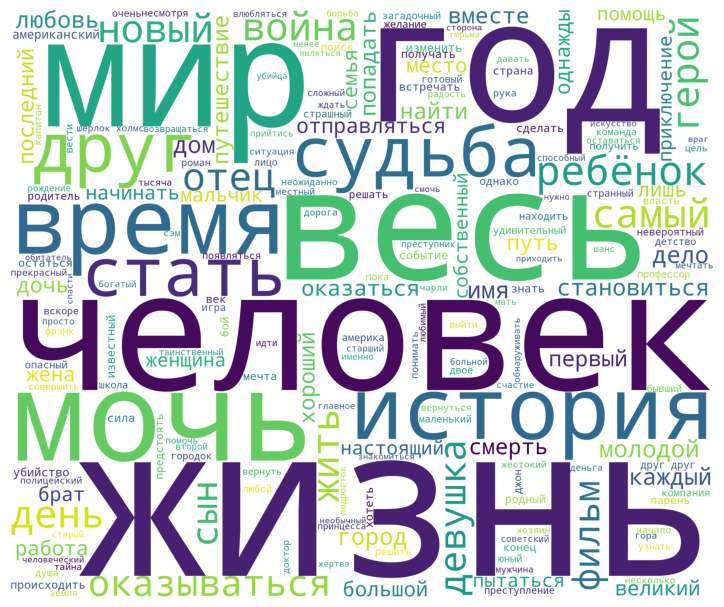

In [67]:
corpus = get_corpus(df['tokenize_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [68]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

<Axes: >

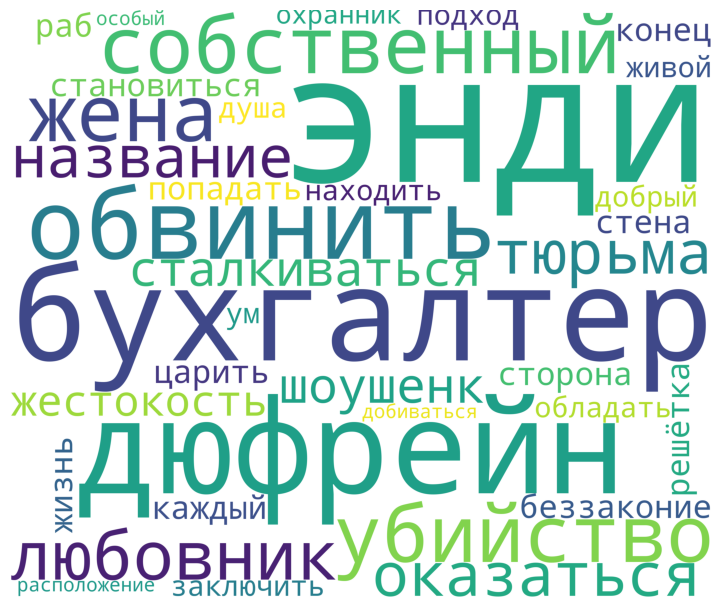

In [69]:
corpus = df['tokenize_text'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

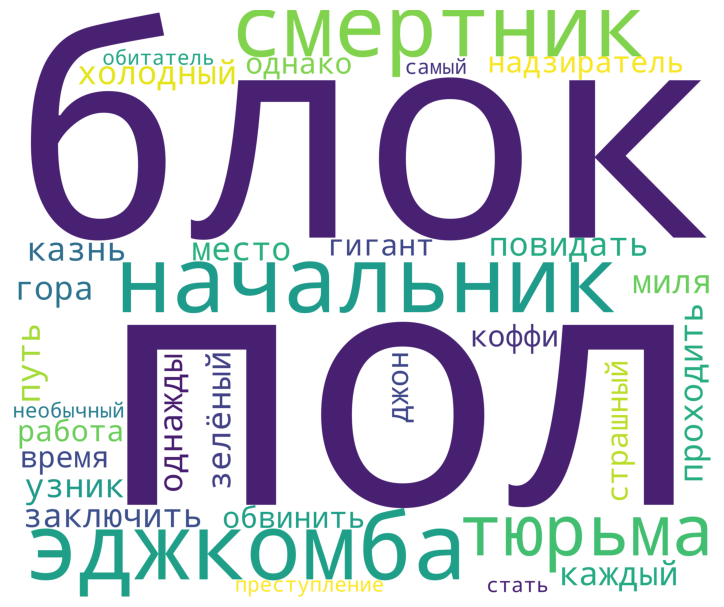

In [70]:
corpus = df['tokenize_text'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

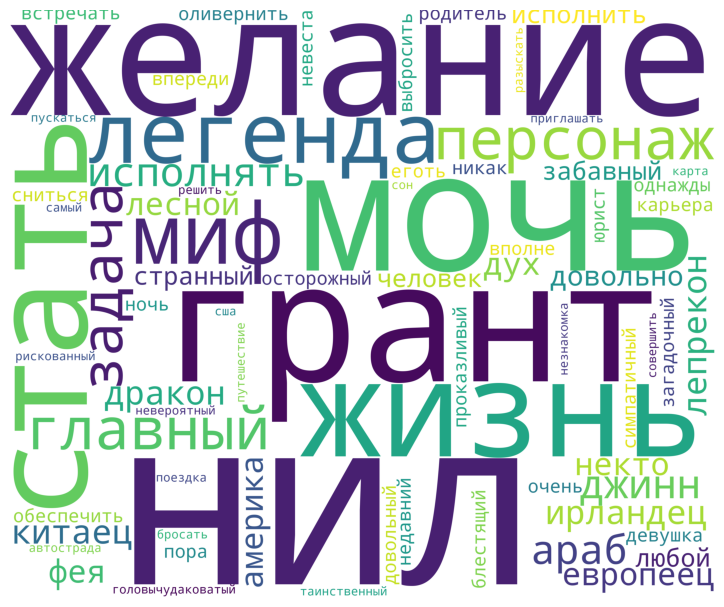

In [71]:
corpus = df['tokenize_text'][200]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [81]:
import re
from collections import Counter

def remove_most_common_words(text, num_words=10):
   
    words = re.findall(r"\b[a-zA-Zа-яА-ЯёЁ]+\b", text.lower())
    
    word_counts = Counter(words)
    
    most_common = [word for word, count in word_counts.most_common(num_words)]

    #print(word_counts)
    
    pattern = re.compile(r"\b(" + "|".join(map(re.escape, most_common)) + r")\b", flags=re.IGNORECASE)
    cleaned_text = pattern.sub("", text)
    
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text


In [75]:
df['tokenize_text'][0]

'бухгалтер энди дюфрейн обвинить убийство собственный жена любовник оказаться тюрьма название шоушенк сталкиваться жестокость беззаконие царить сторона решётка каждый попадать стена становиться раб конец жизнь энди обладать живой ум добрый душа находить подход заключить охранник добиваться особый расположение'

In [83]:
cleaned_text = remove_most_common_words(df['tokenize_text'][0], 5)
print("Очищенный текст:", cleaned_text)

Очищенный текст: собственный жена любовник оказаться тюрьма название шоушенк сталкиваться жестокость беззаконие царить сторона решётка каждый попадать стена становиться раб конец жизнь обладать живой ум добрый душа находить подход заключить охранник добиваться особый расположение


In [85]:
cleaned_text = remove_most_common_words(df['tokenize_text'][200], 5)
print("Очищенный текст:", cleaned_text)

Очищенный текст: легенда миф персонаж главный задача исполнять араб джинн ирландец лепрекон китаец дракон европеец фея лесной дух америка некто довольно странный забавный человек исполнить любой осторожный очень проказливый еготь встречать однажды оливернить вполне довольный обеспечить родитель симпатичный невеста впереди блестящий карьера юрист недавний пора ночь стать сниться загадочный девушка никак выбросить головычудаковатый приглашать совершить поездка таинственный автострада 60 карта сша бросать пускаться самый невероятный рискованный путешествие решить стать разыскать незнакомка сон


In [87]:
df['tokenize_text2'] = [remove_most_common_words(text, 5) for text in df['tokenize_text']]

In [89]:
df.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,prep_text,text_lemm,tokenize_text,tokenize_text2
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,бухгалтер энди дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинить в убийство соб...,бухгалтер энди дюфрейн обвинить убийство собст...,собственный жена любовник оказаться тюрьма наз...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,пол эджкомб начальник блока смертников в тюр...,пол эджкомба начальник блок смертник в тюрьма ...,пол эджкомба начальник блок смертник тюрьма « ...,тюрьма « холодный гора » каждый узник однажды ...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,от лица главного героя форреста гампа слабоумн...,от лицо главное герой форрест гампа слабоумный...,лицо главное герой форрест гампа слабоумный бе...,слабоумный безобидный человек благородный откр...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,фильм рассказывает реальную историю загадочног...,фильм рассказывать реальный история загадочный...,фильм рассказывать реальный история загадочный...,оскар шиндлера член нацистский партия преуспев...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,пострадав в результате несчастного случая бога...,пострадать в результат несчастный случай богат...,пострадать результат несчастный случай богатый...,несчастный случай богатый нанимать помощник че...


In [91]:
df['tokenize_text2'][0]

'собственный жена любовник оказаться тюрьма название шоушенк сталкиваться жестокость беззаконие царить сторона решётка каждый попадать стена становиться раб конец жизнь обладать живой ум добрый душа находить подход заключить охранник добиваться особый расположение'

In [93]:
df['tokenize_text2'][200]

'легенда миф персонаж главный задача исполнять араб джинн ирландец лепрекон китаец дракон европеец фея лесной дух америка некто довольно странный забавный человек исполнить любой осторожный очень проказливый еготь встречать однажды оливернить вполне довольный обеспечить родитель симпатичный невеста впереди блестящий карьера юрист недавний пора ночь стать сниться загадочный девушка никак выбросить головычудаковатый приглашать совершить поездка таинственный автострада 60 карта сша бросать пускаться самый невероятный рискованный путешествие решить стать разыскать незнакомка сон'

In [95]:
df['tokenize_text2'][3]

'оскар шиндлера член нацистский партия преуспевать фабрикант спасти время второй мировой война 1200 еврей'

In [97]:
df['tokenize_text'][3]

'фильм рассказывать реальный история загадочный оскар шиндлера член нацистский партия преуспевать фабрикант спасти время второй мировой война 1200 еврей'

In [99]:
df['overview'][3]

'Фильм рассказывает реальную историю загадочного Оскара Шиндлера; члена нацистской партии; преуспевающего фабриканта; спасшего во\xa0время Второй мировой войны почти 1200 евреев.'

# Векторизация текстовых данных

### Bag of words

In [101]:
vectorizer = CountVectorizer()
count_matrix1 = vectorizer.fit(df['tokenize_text2'])

In [103]:
len(vectorizer.vocabulary_)

4443

In [105]:
print(vectorizer.vocabulary_)

{'собственный': 3586, 'жена': 1056, 'любовник': 1702, 'оказаться': 2298, 'тюрьма': 3959, 'название': 1946, 'шоушенк': 4350, 'сталкиваться': 3727, 'жестокость': 1068, 'беззаконие': 219, 'царить': 4229, 'сторона': 3763, 'решётка': 3294, 'каждый': 1383, 'попадать': 2760, 'стена': 3748, 'становиться': 3728, 'раб': 3143, 'конец': 1504, 'жизнь': 1078, 'обладать': 2210, 'живой': 1070, 'ум': 4029, 'добрый': 943, 'душа': 1019, 'находить': 2002, 'подход': 2683, 'заключить': 1137, 'охранник': 2462, 'добиваться': 934, 'особый': 2358, 'расположение': 3231, 'холодный': 4208, 'гора': 766, 'узник': 4010, 'однажды': 2288, 'проходить': 3094, 'зелёный': 1217, 'миля': 1819, 'путь': 3133, 'место': 1797, 'казнь': 1387, 'повидать': 2612, 'надзиратель': 1938, 'время': 581, 'работа': 3144, 'однако': 2289, 'гигант': 724, 'джон': 915, 'коффи': 1544, 'обвинить': 2194, 'страшный': 3774, 'преступление': 2919, 'стать': 3747, 'самый': 3377, 'необычный': 2093, 'обитатель': 2208, 'слабоумный': 3509, 'безобидный': 225, 

In [107]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['tokenize_text'])

In [109]:
count_matrix.shape

(250, 1849)

In [111]:
vectorizer.get_feature_names_out()[160:200]

array(['вместе', 'вместо', 'внедрить', 'внезапно', 'внешний', 'внимание',
       'вновь', 'внутренний', 'вода', 'воевать', 'военный',
       'возвращаться', 'возвращаться домой', 'возглавлять', 'воздушный',
       'возможность', 'возраст', 'воин', 'воинственный', 'война',
       'войско', 'вокруг', 'волос', 'волшебник', 'волшебник гэндальф',
       'волшебный', 'волшебство', 'воля', 'воля судьба', 'воплощение',
       'вор', 'воробей', 'восемь', 'восемь год', 'воспитывать',
       'воспользоваться', 'воссоздать', 'восточный', 'вотвота', 'впадать'],
      dtype=object)

In [113]:
print(count_matrix)

  (0, 1835)	2
  (0, 918)	1
  (0, 1666)	1
  (0, 1496)	1
  (0, 442)	1
  (0, 958)	1
  (0, 1659)	1
  (0, 817)	1
  (0, 1552)	1
  (0, 450)	1
  (0, 47)	1
  (0, 1769)	1
  (0, 1574)	1
  (0, 1376)	1
  (0, 587)	1
  (0, 1133)	1
  (0, 1568)	1
  (0, 1553)	1
  (0, 1323)	1
  (0, 634)	1
  (0, 454)	1
  (0, 923)	1
  (0, 451)	1
  (0, 1700)	1
  (0, 395)	1
  :	:
  (249, 208)	1
  (249, 579)	1
  (249, 347)	1
  (249, 295)	1
  (249, 1069)	1
  (249, 1095)	1
  (249, 1601)	1
  (249, 247)	1
  (249, 80)	1
  (249, 102)	1
  (249, 1577)	1
  (249, 34)	1
  (249, 417)	1
  (249, 890)	1
  (249, 227)	1
  (249, 354)	1
  (249, 860)	1
  (249, 969)	1
  (249, 1253)	1
  (249, 670)	1
  (249, 479)	1
  (249, 228)	1
  (249, 372)	1
  (249, 1146)	1
  (249, 1602)	1


### TF-IDF

In [115]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [117]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenize_text'])

CPU times: total: 31.2 ms
Wall time: 99.7 ms


In [119]:
tfidf_matrix.shape

(250, 911)

In [121]:
print(tfidf_matrix)

  (0, 240)	0.26308004294285836
  (0, 415)	0.21622942272152237
  (0, 211)	0.220885827689903
  (0, 189)	0.25332312341957064
  (0, 227)	0.220885827689903
  (0, 460)	0.24507376550500215
  (0, 229)	0.1160601200636749
  (0, 314)	0.220885827689903
  (0, 762)	0.18379212699185477
  (0, 555)	0.19453099880018998
  (0, 293)	0.19453099880018998
  (0, 772)	0.2379278466428548
  (0, 226)	0.27502154734090306
  (0, 761)	0.27502154734090306
  (0, 814)	0.2379278466428548
  (0, 473)	0.18889264154676183
  (0, 220)	0.1975898254892655
  (0, 730)	0.20083414594480653
  (0, 819)	0.20428791832347767
  (0, 458)	0.26308004294285836
  (1, 459)	0.2330344369896952
  (1, 436)	0.2330344369896952
  (1, 685)	0.17768220813211935
  (1, 768)	0.15875995755685698
  (1, 589)	0.21634291748954132
  :	:
  (248, 668)	0.26206444583079014
  (248, 882)	0.2506855420222808
  (248, 76)	0.21533943837609046
  (248, 548)	0.20604219700497506
  (248, 6)	0.2506855420222808
  (248, 85)	0.20604219700497506
  (248, 134)	0.16104595335816868
  (248

In [123]:
tfidf_vectorizer.get_feature_names_out()[150:160]

array(['городок', 'готовиться', 'готовый', 'грабитель', 'грабёж',
       'гражданин', 'гражданский', 'гражданский война', 'грандиозный',
       'грозить'], dtype=object)

# Тематическое моделирование

Тематическое моделирование позволяет выделять из текстов темы, связанные с определенными множествами слов, и затем смотреть, с какой вероятностью тексты соотносятся с этими темами. 

Библиотека **gensim**. Это популярная открытая библиотека для тематического моделирования, в которой есть нужная модель — LDA (Латентном размещении Дирихле (LDA)). Затем следует создать словарь для тематического моделирования из лемматизированного текста. 

После создания словаря лучше всего отфильтровать те слова, которые встречаются в слишком большом количестве текстов, и те, которые встречаются слишком редко. Для этого есть метод filter_extremes, который принимает в себя аргументы no_above (только слова, которые встречаются не более чем в указанной доле текстов) и no_below (слова, которые встречаются не менее чем в указанном количестве текстов). 

После удаления лишних слов словарь лучше всего ужать в размерах, убрав пропуски с помощью метода compactify.

In [125]:
import gensim

In [127]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [129]:
df['tokenize_text3'] = [tokenize2(text) for text in df['tokenize_text2']]

In [131]:
df.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,prep_text,text_lemm,tokenize_text,tokenize_text2,tokenize_text3
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,бухгалтер энди дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинить в убийство соб...,бухгалтер энди дюфрейн обвинить убийство собст...,собственный жена любовник оказаться тюрьма наз...,"[собственный, жена, любовник, оказаться, тюрьм..."
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...,пол эджкомб начальник блока смертников в тюр...,пол эджкомба начальник блок смертник в тюрьма ...,пол эджкомба начальник блок смертник тюрьма « ...,тюрьма « холодный гора » каждый узник однажды ...,"[тюрьма, «, холодный, гора, », каждый, узник, ..."
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...,от лица главного героя форреста гампа слабоумн...,от лицо главное герой форрест гампа слабоумный...,лицо главное герой форрест гампа слабоумный бе...,слабоумный безобидный человек благородный откр...,"[слабоумный, безобидный, человек, благородный,..."
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...,фильм рассказывает реальную историю загадочног...,фильм рассказывать реальный история загадочный...,фильм рассказывать реальный история загадочный...,оскар шиндлера член нацистский партия преуспев...,"[оскар, шиндлера, член, нацистский, партия, пр..."
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...,пострадав в результате несчастного случая бога...,пострадать в результат несчастный случай богат...,пострадать результат несчастный случай богатый...,несчастный случай богатый нанимать помощник че...,"[несчастный, случай, богатый, нанимать, помощн..."


In [133]:
gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text3'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

In [135]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['tokenize_text3']]

In [137]:
corpus

[[(0, 1)],
 [],
 [(0, 1), (1, 1)],
 [(1, 1)],
 [(2, 1)],
 [],
 [],
 [(0, 1), (3, 1), (4, 1)],
 [],
 [],
 [(1, 1)],
 [(0, 1)],
 [(5, 1)],
 [],
 [(5, 1)],
 [],
 [(6, 1)],
 [],
 [(5, 1)],
 [(0, 1), (7, 1)],
 [(2, 1)],
 [(2, 1), (8, 1)],
 [(4, 1), (5, 1), (8, 1)],
 [],
 [(5, 1)],
 [],
 [(5, 1)],
 [(3, 1), (8, 1)],
 [(8, 1)],
 [(3, 1)],
 [(0, 1), (4, 1)],
 [],
 [],
 [(7, 1)],
 [],
 [],
 [],
 [(4, 1), (7, 1)],
 [],
 [(2, 1)],
 [],
 [(3, 2), (4, 1), (8, 1)],
 [],
 [(0, 1)],
 [(8, 1)],
 [],
 [(7, 1)],
 [],
 [(1, 1)],
 [],
 [(3, 1), (6, 1)],
 [],
 [],
 [(2, 1), (8, 1)],
 [(2, 1)],
 [(1, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [(1, 1), (2, 1), (6, 1)],
 [(4, 1)],
 [],
 [(3, 2), (7, 1)],
 [(0, 1)],
 [],
 [(8, 1)],
 [(5, 1), (6, 1)],
 [(3, 1)],
 [(2, 1), (6, 2)],
 [],
 [(1, 1), (8, 1)],
 [(0, 1)],
 [],
 [(2, 1)],
 [(6, 1)],
 [],
 [],
 [(6, 1), (8, 1)],
 [(1, 1), (2, 1), (8, 1)],
 [],
 [],
 [],
 [],
 [],
 [(6, 1)],
 [],
 [],
 [(1, 1), (6, 1)],
 [],
 [(6, 1)],
 [(8, 1)],
 [(0, 1), (2, 1)],
 [],
 [(3, 1), (

In [139]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [141]:
lda_20.print_topics()

[(0,
  '0.490*"судьба" + 0.477*"герой" + 0.006*"оказываться" + 0.006*"война" + 0.004*"имя" + 0.004*"молодой" + 0.004*"друг" + 0.004*"становиться" + 0.004*"день"'),
 (1,
  '0.535*"оказываться" + 0.417*"война" + 0.013*"друг" + 0.008*"молодой" + 0.006*"имя" + 0.006*"становиться" + 0.005*"судьба" + 0.005*"герой" + 0.005*"день"'),
 (2,
  '0.358*"молодой" + 0.333*"друг" + 0.286*"имя" + 0.005*"день" + 0.004*"судьба" + 0.004*"война" + 0.003*"герой" + 0.003*"оказываться" + 0.003*"становиться"'),
 (3,
  '0.904*"становиться" + 0.030*"оказываться" + 0.012*"имя" + 0.009*"судьба" + 0.009*"друг" + 0.009*"война" + 0.009*"герой" + 0.009*"день" + 0.009*"молодой"'),
 (4,
  '0.763*"день" + 0.153*"война" + 0.028*"друг" + 0.017*"судьба" + 0.009*"имя" + 0.008*"молодой" + 0.008*"оказываться" + 0.008*"становиться" + 0.007*"герой"')]

In [143]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [145]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [146]:
pyLDAvis.enable_notebook()

In [149]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.017580  0.360114       1        1  29.110177
0     -0.340768 -0.174344       2        1  22.493369
1      0.229914 -0.140654       3        1  18.945868
4      0.187228 -0.095090       4        1  15.676600
3     -0.058794  0.049974       5        1  13.773986, topic_info=          Term       Freq      Total Category  logprob  loglift
0  становиться  25.000000  25.000000  Default   9.0000   9.0000
8         день  24.000000  24.000000  Default   8.0000   8.0000
7  оказываться  21.000000  21.000000  Default   7.0000   7.0000
5        герой  22.000000  22.000000  Default   6.0000   6.0000
6       судьба  23.000000  23.000000  Default   5.0000   5.0000
1        война  21.000000  21.000000  Default   4.0000   4.0000
2      молодой  21.000000  21.000000  Default   3.0000   3.0000
3         друг  21.000000  21.000000  Default   2.0000   2.0000
4          имя  17.000000  17.000000  Default   1.0000   1.0000
2      молодой  20.968223  21.936437   Topic1  -1.0262   1.1889
4          имя  16.754198  17.779761   Topic1  -1.2506   1.1747
3         друг  19.474935  21.309298   Topic1  -1.1001   1.1441
8         день   0.308960  24.963446   Topic1  -5.2438  -3.1579
6       судьба   0.244058  23.393737   Topic1  -5.4796  -3.3287
1        война   0.207064  21.424319   Topic1  -5.6440  -3.4052
7  оказываться   0.189521  21.901315   Topic1  -5.7325  -3.5157
5        герой   0.191925  22.432967   Topic1  -5.7199  -3.5271
0  становиться   0.172567  25.858720   Topic1  -5.8262  -3.7755
5        герой  21.567168  22.432967   Topic2  -0.7402   1.4526
6       судьба  22.145212  23.393737   Topic2  -0.7137   1.4371
7  оказываться   0.281199  21.901315   Topic2  -5.0800  -2.8633
1        война   0.264091  21.424319   Topic2  -5.1428  -2.9040
4          имя   0.199375  17.779761   Topic2  -5.4239  -2.9987
2      молодой   0.196307  21.936437   Topic2  -5.4394  -3.2243
3         друг   0.189687  21.309298   Topic2  -5.4737  -3.2296
0  становиться   0.189372  25.858720   Topic2  -5.4754  -3.4247
8         день   0.179262  24.963446   Topic2  -5.5303  -3.4444
7  оказываться  20.358292  21.901315   Topic3  -0.6262   1.5905
1        война  15.882419  21.424319   Topic3  -0.8745   1.3643
3         друг   0.511520  21.309298   Topic3  -4.3101  -2.0659
2      молодой   0.288234  21.936437   Topic3  -4.8837  -2.6685
4          имя   0.218745  17.779761   Topic3  -5.1596  -2.7343
6       судьба   0.209023  23.393737   Topic3  -5.2050  -3.0542
5        герой   0.199387  22.432967   Topic3  -5.2522  -3.0595
0  становиться   0.214640  25.858720   Topic3  -5.1785  -3.1279
8         день   0.198932  24.963446   Topic3  -5.2545  -3.1686
8         день  24.031418  24.963446   Topic4  -0.2709   1.8150
1        война   4.820288  21.424319   Topic4  -1.8775   0.3613
3         друг   0.880340  21.309298   Topic4  -3.5778  -1.3336
6       судьба   0.536910  23.393737   Topic4  -4.0722  -1.9214
4          имя   0.283692  17.779761   Topic4  -4.7102  -2.2849
2      молодой   0.245491  21.936437   Topic4  -4.8548  -2.6396
7  оказываться   0.241157  21.901315   Topic4  -4.8726  -2.6559
5        герой   0.229610  22.432967   Topic4  -4.9217  -2.7289
0  становиться   0.241061  25.858720   Topic4  -4.8730  -2.8224
0  становиться  25.041080  25.858720   Topic5  -0.1004   1.9503
7  оказываться   0.831146  21.901315   Topic5  -3.5059  -1.2891
4          имя   0.323751  17.779761   Topic5  -4.4487  -2.0235
3         друг   0.252815  21.309298   Topic5  -4.6960  -2.4519
1        война   0.250458  21.424319   Topic5  -4.7054  -2.4666
6       судьба   0.258533  23.393737   Topic5  -4.6736  -2.5228
5        герой   0.244877  22.432967   Topic5  -4.7279  -2.5351
2      молодой   0.238182  21.936437   Topic5  -4.7556  -2.5405
8         день   0.244873  24.963446   Topic5  -4.7279  -2.6420, token_table=      Topic      Freq         Term
term       

LDA - это метод машинного обучения, который используется для анализа тематической структуры в больших наборах документов. Который использует модель вероятности, чтобы определить, какие темы присутствуют в каждом документе, и какие слова связаны с каждой темой. LDA может быть полезен в случаях, когда нужно опредлить тематическую структуру в большом наборе документов, таких как статьи и т.д.

In [151]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
                                 texts=df['tokenize_text3'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

Когерентность модели: 0.38133087605274474


In [153]:
from sklearn.decomposition import LatentDirichletAllocation

In [155]:
# создание модели LDA
lda_model = LatentDirichletAllocation(n_components=6, random_state=0)
lda_model.fit(count_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, война, год, герой, время, мир, отец, становиться, весь, большой
Topic 1: человек, жизнь, судьба, год, война, новый, время, мочь, место, каждый
Topic 2: весь, год, жизнь, друг, мир, история, герой, ребёнок, оказаться, главный
Topic 3: жизнь, история, человек, попадать, детство, год, стать, забавный, друг, подросток
Topic 4: человек, жизнь, молодой, весь, мир, мочь, жить, девушка, оказываться, ребёнок
Topic 5: год, жизнь, друг, мочь, весь, стать, история, великий, хотеть, бильбо


In [157]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=11)
lda_model.fit(count_matrix)

LatentDirichletAllocation(learning_method='online', n_components=11, n_jobs=-1,
                          random_state=5)

In [159]:
#датафрейм для ключевых слов каждой темы
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,вести,обвинить,вместе,вспоминать,воробей,многие,каждый,заведение,купить,шайка,преступление
1,взять,скоро,жена,пока,преступник,оставаться,превращаться,искусство,практически,мировой,встречать
2,убеждение,впереди,город,путешествие,неожиданно,принц,бандит,стать,трасса,весь,домой
3,редкий,находиться,оказаться,небольшой,депрессия,узнать,парень,жить,пытаться,доверять,долгий
4,полицейский,место назначение,молодой человек,мечта,джек воробей,прекрасный,ограбить,нести,24,шерлок холмс,разделить
5,мочь,старое,хотеть,мальчик,дочь,поиск,молодой,проходить,необычный,дом,томми
6,королева,данил,век,оказываться,полиция,смерть,дать,родитель,таинственный,лицо,тренировать
7,труд,назначение,событие,второй,двое,схватка,работать,проводить,преступление,посвятить,отец
8,шанс,мастер,мужчина,последний,джонс,подросток,герой,забывать,отправляться,зависеть,молодой
9,обычный,новый место,знать,найти,индиана,опасный,кличка,боец,основа,сила,искусство


NMF - это метод машинного обучения, который используется для разложения матрицы на две с неотрицательными элементами. Он может быть полезен в случаях, когда нужно найти скрытые признаки в данных, таких как тексты и т.д. NMF может использоваться в различных областях, таких как обработка изображений, текстовый анализ и т.д

In [161]:
from sklearn.decomposition import NMF

In [163]:
# создание модели NMF
nmf_model = NMF(n_components=10, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: человек, мочь, жить, девушка, мир, судьба, путешествие, жизнь, весь, изменить
Topic 1: шерлок холмс, холмс, шерлок, ватсон, доктор, доктор ватсон, схватка, убийца, сыщик, угроза
Topic 2: война, мировой, мировой война, второй мировой, второй мировой война, второй, лагерь, время, семья, время второй
Topic 3: марти, машина, время, подросток, машина время, попадать, док, помощь, приключение, далёкий
Topic 4: друг, друг друг, стать, сильный, любовь, однажды, удивительный, решать, тело, год
Topic 5: отец, сын, брат, дочь, работа, роман, большой, старший, сэм, дело
Topic 6: джек, элизабет, уилла, капитан, джек воробей, воробей, проклятие, вечный, приключение, свет
Topic 7: ребёнок, мир, родитель, мальчик, дом, малыш, актёр, дорога, жизнь, весь
Topic 8: жизнь, год, герой, фильм, мечта, каждый, стать, тысяча, известный, знаменитый
Topic 9: бой, новый, год, любовь, кольцо, родный, земля, остаться, война, джон


C:\Users\rezed\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [165]:
# создание модели NMF
nmf_model = NMF(n_components=5, random_state=0)
nmf_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: ребёнок, мир, мочь, отец, человек, весь, девушка, жизнь, дело, жить
Topic 1: холмс, шерлок, шерлок холмс, ватсон, доктор, доктор ватсон, схватка, убийца, сыщик, угроза
Topic 2: друг, друг друг, стать, любовь, сильный, год, новый, девушка, однажды, удивительный
Topic 3: жизнь, год, время, герой, фильм, век, попадать, каждый, мечта, машина
Topic 4: война, бой, сын, мировой, судьба, последний, мировой война, человек, время, второй мировой


C:\Users\rezed\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


LSA - это метод машинного обучения, который используется для анализа структуры в больших наборах текстовых данных. Он использует матричные вычисления для определения близости между словами и документами. LSA может быть полезен в случаях, когда вы хотите определить структуру в большом наборе текстовых данных, таких как статьи, отчеты и т.д.

In [168]:
from sklearn.decomposition import TruncatedSVD

In [170]:
# создание модели LSA
lsa_model = TruncatedSVD(n_components=5, random_state=0)
lsa_model.fit(tfidf_matrix)

# вывод топ слов для каждой темы
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, год, человек, друг, мочь, весь, мир, время, судьба, стать
Topic 1: друг, шерлок холмс, холмс, шерлок, ватсон, доктор, доктор ватсон, схватка, друг друг, лондон
Topic 2: друг, друг друг, девушка, жить, удивительный, стать, однажды, любовь, странный, жизнь
Topic 3: время, марти, век, год, машина, история, попадать, машина время, приключение, герой
Topic 4: друг, сын, война, отец, новый, любовь, капитан, бой, джек, время


## Кластеризация

In [172]:
num_clusters = 5

# Метод к-средних - KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters)

In [174]:
%%time
km.fit(tfidf_matrix)

CPU times: total: 15.6 ms
Wall time: 234 ms


KMeans(n_clusters=5)

In [176]:
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [178]:
len(km.labels_)

250

In [180]:
clusters[:10]

[1, 3, 2, 4, 2, 2, 2, 3, 0, 3]

In [182]:
clusterkm = km.labels_.tolist()
df['cluster']= clusterkm

In [184]:
df['cluster'].value_counts()

cluster
2    64
1    63
0    48
4    46
3    29
Name: count, dtype: int64

In [202]:
df0 = df[df['cluster']==0]

In [224]:
df0.head(10)

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,prep_text,text_lemm,tokenize_text,tokenize_text2,tokenize_text3,cluster
8,8,Бойцовский клуб,1999,США,8.645,Сотрудник страховой компании страдает хроничес...,Дэвид Финчер,Джим Улс; Чак Паланик,Эдвард Нортон; Брэд Питт; Хелена Бонем Картер;...,'https://st.kp.yandex.net/images/film_iphone/i...,сотрудник страховой компании страдает хроничес...,сотрудник страховой компания страдать хроничес...,сотрудник страховой компания страдать хроничес...,страдать хронический бессонница отчаянно пытат...,"[страдать, хронический, бессонница, отчаянно, ...",0
17,17,Интерстеллар,2014,США,8.591,Когда засуха; пыльные бури и вымирание растени...,Кристофер Нолан,Джонатан Нолан; Кристофер Нолан,Мэттью МакКонахи; Энн Хэтэуэй; Джессика Честей...,'https://st.kp.yandex.net/images/film_iphone/i...,когда засуха пыльные бури и вымирание растений...,когда засуха пыльный буря и вымирание растение...,засуха пыльный буря вымирание растение приводи...,вымирание растение приводить продовольственный...,"[вымирание, растение, приводить, продовольстве...",0
22,22,Матрица,1999,США,8.490,Жизнь Томаса Андерсона разделена на две части:...,Лана Вачовски; Лилли Вачовски,Лилли Вачовски; Лана Вачовски,Киану Ривз; Лоренс Фишбёрн; Кэрри-Энн Мосс; Хь...,'https://st.kp.yandex.net/images/film_iphone/i...,жизнь томаса андерсона разделена на две части ...,жизнь томас андерсон разделить на два часть де...,жизнь томас андерсон разделить часть день самы...,андерсон разделить часть день самый обычный оф...,"[андерсон, разделить, часть, день, самый, обыч...",0
23,23,Бриллиантовая рука,1968,СССР,8.516,В южном городке орудует шайка «валютчиков»; во...,Леонид Гайдай,Леонид Гайдай; Морис Слободской; Яков Костю...,Юрий Никулин; Андрей Миронов; Анатолий Папанов...,'https://st.kp.yandex.net/images/film_iphone/i...,в южном городке орудует шайка «валютчиков» воз...,в южный городок орудовать шайка « валютчик » в...,южный городок орудовать шайка « валютчик » воз...,орудовать шайка « валютчик » возглавлять шеф п...,"[орудовать, шайка, «, валютчик, », возглавлять...",0
24,24,Отступники,2006,США,8.455,Два лучших выпускника полицейской академии ока...,Мартин Скорсезе,Уильям Монахэн; Алан Мак; Феликс Чон,Леонардо ДиКаприо; Мэтт Дэймон; Джек Николсон;...,'https://st.kp.yandex.net/images/film_iphone/i...,два лучших выпускника полицейской академии ока...,два хороший выпускник полицейский академия ока...,хороший выпускник полицейский академия оказать...,оказаться разный сторона баррикада агент ряд п...,"[оказаться, разный, сторона, баррикада, агент,...",0
26,26,Пианист,2002,Польша,8.462,Фильм снят по автобиографии Владислава Шпильма...,Роман Полански,Рональд Харвуд; Владислав Шпильман,Эдриан Броуди; Эмилия Фокс; Даниэль Кальтаджир...,'https://st.kp.yandex.net/images/film_iphone/i...,фильм снят по автобиографии владислава шпильма...,фильм снятой по автобиография владислав шпильм...,фильм снятой автобиография владислав шпильман ...,шпильман хороший пианист 30х год прошлое век г...,"[шпильман, хороший, пианист, 30х, год, прошлое...",0
30,30,Тайна Коко,2017,США,8.608,12-летний Мигель живёт в мексиканской деревушк...,Ли Анкрич; Эдриан Молина,Мэттью Олдрич; Эдриан Молина; Ли Анкрич; ...,Энтони Гонсалес; Гаэль Гарсиа Берналь; Бенджам...,'https://st.kp.yandex.net/images/film_iphone/i...,12летний мигель живёт в мексиканской деревушке...,12летний мигель жить в мексиканский деревушка ...,12летний мигель жить мексиканский деревушка се...,12летний мексиканский деревушка сапожник мечта...,"[12летний, мексиканский, деревушка, сапожник, ...",0
35,35,Пираты Карибского моря: Проклятие Черной жемчу...,2003,США,8.334,Жизнь харизматичного авантюриста; капитана Дже...,Гор Вербински,Тед Эллиот; Терри Россио; Стюарт Битти; ...,Джонни Депп; Джеффри Раш; Орландо Блум; Кира Н...,'https://st.kp.yandex.net/images/film_iphone/i...,жизнь харизматичного авантюриста капитана джек...,жизнь харизматичный авантюрист капитан джек во...,жизнь харизматичный ава

In [206]:
gensim_dictionary = gensim.corpora.Dictionary(df0['tokenize_text3'])

In [208]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df0['tokenize_text3']]

In [210]:
lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [212]:
lda_5.print_topics()

[(0,
  '0.005*"имя" + 0.005*"год" + 0.005*"стать" + 0.005*"оказываться" + 0.005*"хозяин" + 0.005*"оказаться" + 0.003*"пока" + 0.003*"герой" + 0.003*"человек" + 0.003*"новый"'),
 (1,
  '0.008*"вместе" + 0.005*"решать" + 0.005*"мир" + 0.005*"жизнь" + 0.005*"тело" + 0.005*"де" + 0.005*"обнаруживать" + 0.005*"отправляться" + 0.005*"проклятие" + 0.004*"имя"'),
 (2,
  '0.006*"оказываться" + 0.006*"«" + 0.006*"»" + 0.006*"человек" + 0.004*"город" + 0.004*"злой" + 0.004*"поиск" + 0.004*"герой" + 0.004*"друг" + 0.004*"животное"'),
 (3,
  '0.009*"жизнь" + 0.007*"»" + 0.007*"«" + 0.007*"герой" + 0.006*"главный" + 0.006*"воля" + 0.006*"шайка" + 0.006*"пока" + 0.004*"остаться" + 0.004*"женщина"'),
 (4,
  '0.006*"имя" + 0.006*"весь" + 0.005*"однажды" + 0.005*"жизнь" + 0.005*"человек" + 0.005*"найти" + 0.005*"отправиться" + 0.004*"последний" + 0.003*"герой" + 0.003*"»"')]

In [216]:
vis_20 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)

In [218]:
pyLDAvis.enable_notebook()

In [220]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.018757 -0.121699       1        1  23.152924
4     -0.114075  0.033846       2        1  22.838323
1      0.090867  0.068631       3        1  20.544256
3     -0.003472  0.021501       4        1  18.704652
2      0.007923 -0.002279       5        1  14.759845, topic_info=              Term      Freq     Total Category  logprob  loglift
80         человек  5.000000  5.000000  Default  30.0000  30.0000
188        главный  2.000000  2.000000  Default  29.0000  29.0000
160          шайка  2.000000  2.000000  Default  28.0000  28.0000
12           жизнь  7.000000  7.000000  Default  27.0000  27.0000
65    отправляться  3.000000  3.000000  Default  26.0000  26.0000
...            ...       ...       ...      ...      ...      ...
1003         школа  0.607843  1.690392   Topic5  -6.0525   0.8905
993         поттер  0.607841  1.690393   Topic5  -6.0525   0.8905
165     внутренний  0.607832  1.662174   Topic5  -6.0525   0.9073
745      стараться  0.607791  1.697756   Topic5  -6.0526   0.8860
274           враг  0.607781  2.885911   Topic5  -6.0526   0.3555

[291 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
121       1  0.135971         «
121       2  0.135971         «
121       3  0.135971         «
121       4  0.271942         «
121       5  0.271942         «
...     ...       ...       ...
983       2  0.557959     шрека
320       3  0.576029  элизабет
799       4  0.606288        юг
799       5  0.606288        юг
610       2  0.844657     юноша

[376 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])

In [222]:
df1 = df[df['cluster']==1]

In [234]:
df1.head(10)

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo,prep_text,text_lemm,tokenize_text,tokenize_text2,tokenize_text3,cluster
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...,бухгалтер энди дюфрейн обвинён в убийстве собс...,бухгалтер энди дюфрейн обвинить в убийство соб...,бухгалтер энди дюфрейн обвинить убийство собст...,собственный жена любовник оказаться тюрьма наз...,"[собственный, жена, любовник, оказаться, тюрьм...",1
11,11,Достучаться до небес,1997,Германия,8.629,Судьба сводит героев картины в больнице; где в...,Томас Ян,Томас Ян; Тиль Швайгер,Тиль Швайгер; Ян Йозеф Лиферс; Тьерри Ван Верв...,'https://st.kp.yandex.net/images/film_iphone/i...,судьба сводит героев картины в больнице где вр...,судьба сводить герой картина в больница где вр...,судьба сводить герой картина больница врач вын...,врач выносить смертный приговор счёт время жиз...,"[врач, выносить, смертный, приговор, счёт, вре...",1
19,19,Гладиатор,2000,США,8.577,В великой Римской империи не было военачальник...,Ридли Скотт,Дэвид Францони; Джон Логан; Уильям Николсон,Рассел Кроу; Хоакин Феникс; Конни Нильсен; Оли...,'https://st.kp.yandex.net/images/film_iphone/i...,в великой римской империи не было военачальник...,в великий римский империя не быть военачальник...,великий римский империя военачальник равный ге...,военачальник равный максимуса непобедимый леги...,"[военачальник, равный, максимуса, непобедимый,...",1
21,21,Карты; деньги; два ствола,1998,Великобритания,8.547,Четверо молодых парней накопили каждый по 25 т...,Гай Ричи,Гай Ричи,Джейсон Флеминг; Декстер Флетчер; Ник Моран; Д...,'https://st.kp.yandex.net/images/film_iphone/i...,четверо молодых парней накопили каждый по 25 т...,четверо молодой парень накопить каждый по 25 т...,четверо молодой парень накопить каждый 25 тыся...,четверо молодой накопить 25 фунт мочь сыграть ...,"[четверо, молодой, накопить, 25, фунт, мочь, с...",1
27,27,Властелин колец: Братство кольца,2001,США,8.570,Сказания о Средиземье — это хроника Великой во...,Питер Джексон,Фрэн Уолш; Филиппа Бойенс; Питер Джексон; ...,Элайджа Вуд; Иэн Маккеллен; Шон Эстин; Вигго М...,'https://st.kp.yandex.net/images/film_iphone/i...,сказания о средиземье это хроника великой во...,сказание о средиземье это хроника великий войн...,сказание средиземье хроника великий война коль...,сказание хроника великий длиться тысяча год вл...,"[сказание, хроника, великий, длиться, тысяча, ...",1
32,32,Властелин колец: Две крепости,2002,Новая Зеландия,8.566,Братство распалось; но Кольцо Всевластья должн...,Питер Джексон,Фрэн Уолш; Филиппа Бойенс; Стивен Синклер; ...,Элайджа Вуд; Иэн Маккеллен; Вигго Мортенсен; Л...,'https://st.kp.yandex.net/images/film_iphone/i...,братство распалось но кольцо всевластья должно...,братство распасться но кольцо всевластие должн...,братство распасться кольцо всевластие уничтожи...,фродый сэм вынудить доверить жизнь голлум взят...,"[фродый, сэм, вынудить, доверить, жизнь, голлу...",1
33,33,Американская история X,1998,США,8.296,Лидер местной банды скинхедов Дерек Виньярд пр...,Тони Кэй,Дэвид МакКенна,Эдвард Нортон; Эдвард Ферлонг; Беверли Д’Андже...,'https://st.kp.yandex.net/images/film_iphone/i...,лидер местной банды скинхедов дерек виньярд пр...,лидер местный банда скинхед дерек виньярд проч...,лидер местный банда скинхед дерек виньярд проч...,банда скинхед виньярд прочно удерживать автори...,"[банда, скинхед, виньярд, прочно, удерживать, ...",1
34,34,Джентльмены удачи,1971,СССР,8.526,Заведующему детсадом Трошкину фатально не пове...,Александр Серый,Георгий Данелия; Виктория Токарева,Евгений Леонов; Георгий Вицин; Раднэр Муратов;...,'https://st.kp.yandex.net/images/film_iphone/i...,заведующему детсадом трошкину фатально не пове...,заведовать детсад трошкина фатально не повезти...,заведовать детсад трошкина фатально повезти ок..

In [236]:
def lda5_model(df):
    gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text3'])

    corpus = [gensim_dictionary.doc2bow(text) for text in df['tokenize_text3']]

    lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

    print(lda_5.print_topics())
    vis_5 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)
    display(vis_5)

In [238]:
lda5_model(df1)

[(0, '0.007*"«" + 0.007*"»" + 0.005*"мочь" + 0.005*"судьба" + 0.004*"время" + 0.004*"человек" + 0.004*"жизнь" + 0.004*"сложный" + 0.004*"жить" + 0.004*"герой"'), (1, '0.007*"человек" + 0.005*"оказаться" + 0.005*"жизнь" + 0.004*"начинать" + 0.004*"проверить" + 0.004*"собственный" + 0.004*"просто" + 0.004*"мужчина" + 0.004*"«" + 0.004*"»"'), (2, '0.006*"мочь" + 0.004*"невероятный" + 0.004*"приключение" + 0.004*"весь" + 0.004*"«" + 0.004*"»" + 0.004*"мир" + 0.004*"опытный" + 0.004*"рука" + 0.004*"таинственный"'), (3, '0.008*"жизнь" + 0.005*"день" + 0.005*"найти" + 0.005*"оказаться" + 0.005*"находить" + 0.004*"весь" + 0.004*"»" + 0.004*"«" + 0.004*"начинать" + 0.004*"становиться"'), (4, '0.006*"убийство" + 0.006*"«" + 0.006*"»" + 0.006*"решить" + 0.005*"мочь" + 0.005*"дело" + 0.003*"конец" + 0.003*"человек" + 0.003*"полиция" + 0.003*"больной"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.081876  0.019686       1        1  23.566455
0      0.079646 -0.032787       2        1  22.116568
2      0.051571  0.105662       3        1  20.704738
1     -0.071790 -0.009041       4        1  18.829696
4      0.022450 -0.083520       5        1  14.782543, topic_info=             Term      Freq     Total Category  logprob  loglift
845        решить  2.000000  2.000000  Default  30.0000  30.0000
257      убийство  6.000000  6.000000  Default  29.0000  29.0000
329       мужчина  2.000000  2.000000  Default  28.0000  28.0000
1104    проверить  2.000000  2.000000  Default  27.0000  27.0000
13       находить  3.000000  3.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
506   легендарный  0.616768  2.930201   Topic5  -6.3316   0.3534
164           год  0.616736  4.739956   Topic5  -6.3316  -0.1276
355       история  0.616279  4.121367   Topic5  -6.3324   0.0115
473     очередной  0.616016  1.709854   Topic5  -6.3328   0.8908
273         кроме  0.615926  2.334910   Topic5  -6.3329   0.5791

[319 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1047      5  0.911884  20летний
114       1  0.171010         «
114       2  0.342021         «
114       3  0.171010         «
114       4  0.171010         «
...     ...       ...       ...
969       3  0.563430    чёрный
750       2  0.418718    эпизод
750       3  0.418718    эпизод
203       1  0.335592         …
203       4  0.335592         …

[437 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])